Implement the non-parametric Locally Weighted Regression
algorithm in order to fit data points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X=np.linspace(-3,3,100).reshape(-1,1)
y=np.sin(X).ravel()+ np.random.normal(scale=0.1,size = X.shape[0])

In [3]:
def lwr(x_query, X_train, y_train, tau):
    W=np.exp( -((X_train-x_query)**2)/(2*tau**2))
    X_bias=np.c_[np.ones_like(X_train),X_train]
    theta= np.linalg.pinv(X_bias.T @ np.diag(W.ravel()) @ X_bias) @ X_bias.T @ np.diag(W.ravel()) @ y_train
    return np.array([1,x_query]) @ theta

In [5]:
X_test = np.linspace(-3,3,100)
y_pred = np.array([lwr(x, X, y, tau=0.5) for x in X_test])

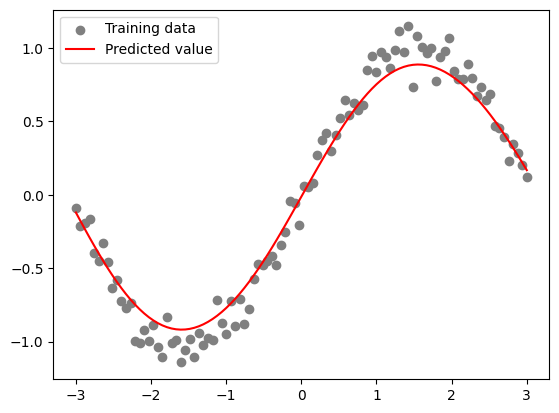

In [7]:
plt.scatter(X, y , color="gray", label="Training data")
plt.plot(X_test, y_pred, color="red", label="Predicted value")
plt.legend()
plt.show()